# Diabetes Detection model

A machine learning model that predicts whether a patient has diabetes through a series of given data.

## Data

The data is from: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

## How the model was made

The model was made using [Scikit-Learn](https://scikit-learn.org/) an excellent machine learning library. I used Naive Bayes as the model.

## How the notebook is structured

* Explore the data
* Visualize our data
* Fit and instantiate the mode;
* Describe our model

### What you will find

* Awesome Graphs that visualize the data
* Use of [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/)
* Use of Scikit-Learn's manu features
* A ROC Curve
* Visual Confusion Matrix
* A custom Classification Report


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import plotly.express as px

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

### Explore Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/machine-learning-projects/diabetes-prediction/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
len(df)

768

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [76]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Visualize Data

In [79]:
condition = ["Does not have Diabetes","Does have diabetes"]

have_or_not = df["Outcome"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]

fig = px.pie(values = df["Outcome"].value_counts(), names = condition, width = 800, height = 400, color_discrete_sequence=["skyblue", "violet"], title="Percentage whether patient has diabetes or not")
fig.show()

In [80]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


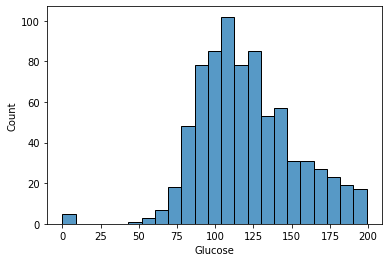

In [97]:
sns.histplot(df["Glucose"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



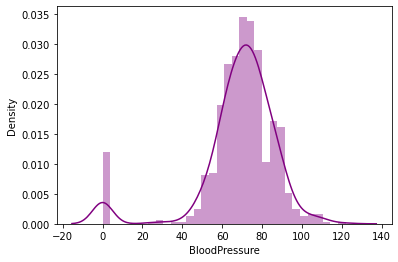

In [111]:
sns.distplot(df["BloodPressure"], color = "purple");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



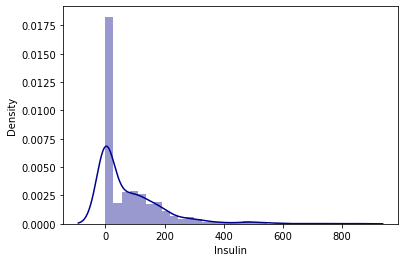

In [126]:
sns.distplot(df["Insulin"], color = "DarkBlue");

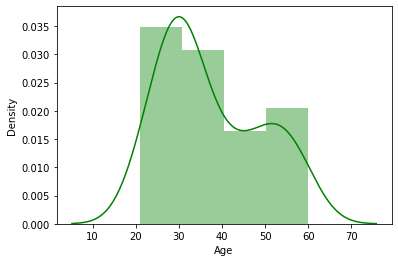

In [143]:
sns.distplot(df["Age"][:50], color = "Green");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



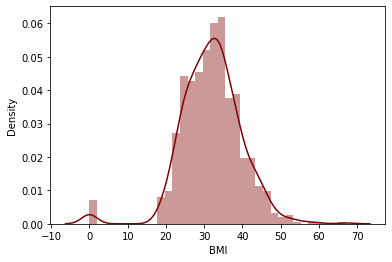

In [147]:
sns.distplot(df["BMI"], color = "Maroon");

## Fit and Score the model

In [57]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
model = GaussianNB()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7922077922077922

In [59]:
y_preds = model.predict(X_test)

### Describe the model

In [60]:
def model_report(y_test, y_preds):
    print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds)}")
    print(f"Recall: {recall_score(y_test, y_preds)}")
    print(f"R2 Score: {r2_score(y_test, y_preds)}")
    print(f"F1 Score: {f1_score(y_test, y_preds)}")
    print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
    print(f"MSE: {mean_squared_error(y_test, y_preds)}")

In [61]:
model_report(y_test, y_preds)

Accuracy: 79.22%
Precision: 0.6744186046511628
Recall: 0.6170212765957447
R2 Score: 0.020083515609465197
F1 Score: 0.6444444444444444
MAE: 0.2077922077922078
MSE: 0.2077922077922078


In [62]:
y_probs = model.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.996788  , 0.05933692, 0.03442097, 0.69858076, 0.0432625 ,
       0.01332408, 0.8935769 , 0.97626433, 0.89977983, 0.40464587])

In [63]:
roc_auc_score(y_test, y_probs_positive)

0.8413203420163055

In [160]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = "green", label = "ROC")

    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend();

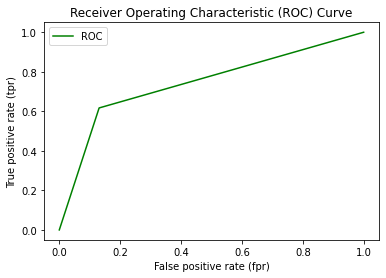

In [161]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plot_roc_curve(fpr, tpr)

In [66]:
pd.crosstab(y_test, y_preds, rownames = ["Actual Label"], colnames = ["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,93,14
1,18,29


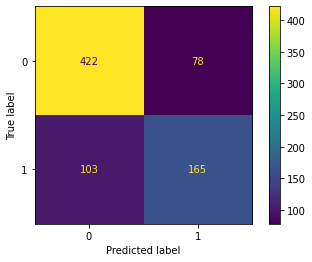

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = model, X = X, y = y);